In [9]:
import matplotlib.pyplot as plt
from mxnet import gluon, nd, image
from mxnet.gluon.data.vision import transforms
from gluoncv import utils
from gluoncv.model_zoo import get_model

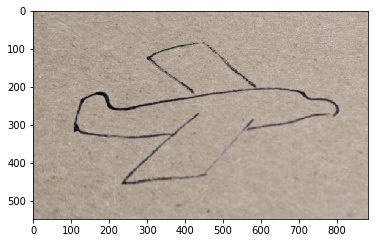

In [10]:
url = 'https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/classification/plane-draw.jpeg'
im_fname = utils.download(url)
img = image.imread(im_fname)
plt.imshow(img.asnumpy())
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


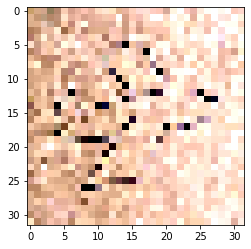

In [11]:
transform_fn = transforms.Compose([
    transforms.Resize(32),
    transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
])
img = transform_fn(img)
# print("img.shape: ", img.shape)
plt.imshow(nd.transpose(img, (1, 2, 0)).asnumpy())
plt.show()

In [13]:
import mxnet as mx
ctx = mx.gpu()
net =  get_model('cifar_resnet110_v1', classes=10, pretrained=True, ctx=ctx)
pred = net(img.copyto(ctx).expand_dims(axis=0))
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
pred

Model file is not found. Downloading.


6336KB [00:01, 5513.78KB/s]                          



[[ 2.5245006  -1.9512345  -0.23564766  2.0961487   0.08405135 -0.3794152
  -2.4032352  -1.7294384   1.9654945   0.06697895]]
<NDArray 1x10 @gpu(0)>